In [27]:
#Import of libraries
import pandas as pd
import numpy as np

In [28]:
#Import of data
df = pd.read_csv('data_combined.csv')
df.head()

,Unnamed: 0,date_crawl,city,uid,book_date,price,event,rating,provider,source,...,conversation_rate,applause_rate,total_engagement,relevance,retweets_cum,likes_cum,replies_cum,retweets_cont,likes_cont,replies_cont
0,0,2023-03-30,La Palma,title_44546103,2023-05-20,90,True,4.78,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
1,1,2023-03-30,La Palma,title_14832235,2023-05-20,86,True,4.78,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
2,2,2023-03-30,La Palma,title_22183776,2023-05-20,63,True,4.90,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
3,3,2023-03-30,La Palma,title_26944967,2023-05-20,109,True,4.76,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0
4,4,2023-03-30,La Palma,title_741718109680848267,2023-05-20,46,True,4.85,privat,airbnb,...,0.055556,3.777778,95,gering,2.0,17.0,0.0,0.0,3.0,0.0


In [29]:
#Data analysis
df.columns

Index(['Unnamed: 0', 'date_crawl', 'city', 'uid', 'book_date', 'price',
       'event', 'rating', 'provider', 'source', 'event_name', 'tweets',
       'retweets', 'likes', 'replies', 'amplification_rate',
       'conversation_rate', 'applause_rate', 'total_engagement', 'relevance',
       'retweets_cum', 'likes_cum', 'replies_cum', 'retweets_cont',
       'likes_cont', 'replies_cont'],
      dtype='object')

In [30]:
#Data cleaning
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('event_name', axis=1, inplace=True)
df.drop('uid', axis=1, inplace=True)



In [31]:
#Feature engineering
df['book_date'] = df['book_date'].astype('datetime64[ns]')
df['date_crawl'] = df['date_crawl'].astype('datetime64[ns]')
df['year'] = df['book_date'].dt.year
df['month'] = df['book_date'].dt.month
df['day'] = df['book_date'].dt.day
df['year_crawl'] = df['date_crawl'].dt.year
df['month_crawl'] = df['date_crawl'].dt.month
df['day_crawl'] = df['date_crawl'].dt.day
df.drop('book_date', axis=1, inplace=True)
df.drop('date_crawl', axis=1, inplace=True)

In [32]:
#get dummies for categorical variables city
df = pd.get_dummies(df, columns=['city'], drop_first=True)
df = pd.get_dummies(df, columns=['event'], drop_first=True)
df = pd.get_dummies(df, columns=['provider'], drop_first=True)
df = pd.get_dummies(df, columns=['source'], drop_first=True)
df = pd.get_dummies(df, columns=['relevance'], drop_first=True)

In [33]:
df.drop('amplification_rate', axis=1, inplace=True)
df.drop('conversation_rate', axis=1, inplace=True)
df.drop('applause_rate', axis=1, inplace=True)
df.drop('retweets_cum', axis=1, inplace=True)
df.drop('likes_cum', axis=1, inplace=True)
df.drop('replies_cum', axis=1, inplace=True)
df.drop('retweets_cont', axis=1, inplace=True)
df.drop('replies_cont', axis=1, inplace=True)
df.drop('likes_cont', axis=1, inplace=True)
df.drop('retweets', axis=1, inplace=True)
df.drop('replies', axis=1, inplace=True)
df.drop('likes', axis=1, inplace=True)
df.drop('tweets', axis=1, inplace=True)

In [34]:
df.columns

Index(['price', 'rating', 'total_engagement', 'year', 'month', 'day',
       'year_crawl', 'month_crawl', 'day_crawl', 'city_Barcelona',
       'city_Berlin', 'city_Bologna', 'city_Brighton', 'city_Bruessel',
       'city_Halle', 'city_Hamburg', 'city_Helsinki', 'city_La Palma',
       'city_Lyon', 'city_Monaco', 'city_Muenchen', 'city_Noordwijk',
       'city_Sevilla', 'event_True', 'provider_privat', 'source_booking',
       'relevance_hoch', 'relevance_mittel', 'relevance_sehr hoch'],
      dtype='object')

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr_XGB = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=12, max_depth=8, subsample=0.7, colsample_bytree=0.3)

# Train the model using the training sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
regr_XGB.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_XGB.predict(X_test)

# Show RMSE, MAPE, R2
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 292.37062008451824
R2: 0.3178097883452904


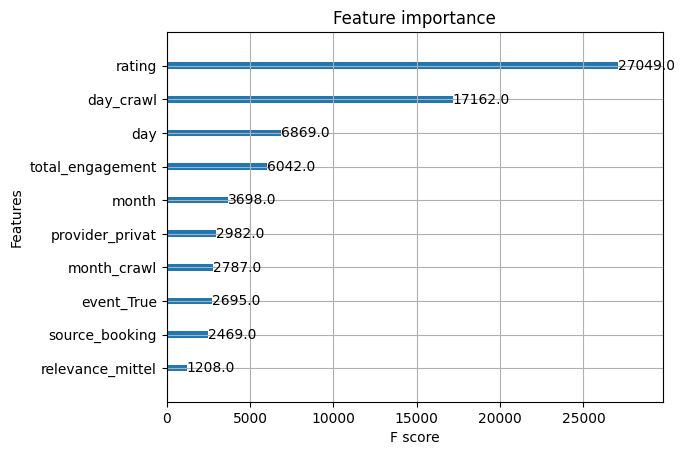

In [36]:
# Show feature importance

from xgboost import plot_importance
from matplotlib import pyplot as plt
plot_importance(regr_XGB, max_num_features=10)
plt.show()


In [37]:
import pickle

# save the trained model to a file using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(regr_XGB, f)

In [38]:
# DF für Prediction in einer neuen CSV-Datei speichern
df.to_csv('xgb_data.csv', index=False, encoding='utf-8-sig', sep=',')